In [57]:
from src.models.linreg import LinReg
from src.output.output import generate_summary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Simple Linear Regression

In [58]:
"""Create our initial Dataset"""

x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)
data = pd.DataFrame()
data = data.assign(outcome=y, independent=x)

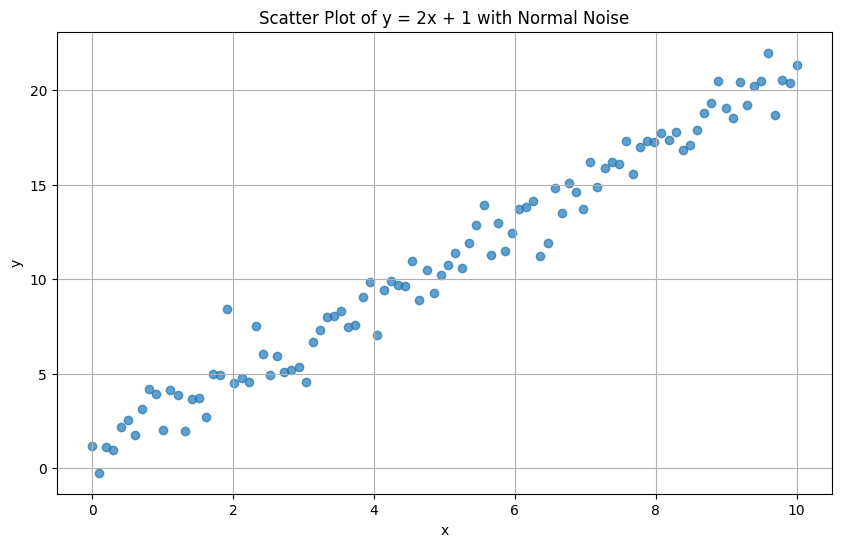

In [59]:
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.title("Scatter Plot of y = 2x + 1 with Normal Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [60]:
"""Create our Linear Regression Model"""

model = LinReg(df=data, 
               outcome="outcome", 
               independent=["independent"])

fitted = model.fitted_values()
data = data.assign(fitted=fitted)



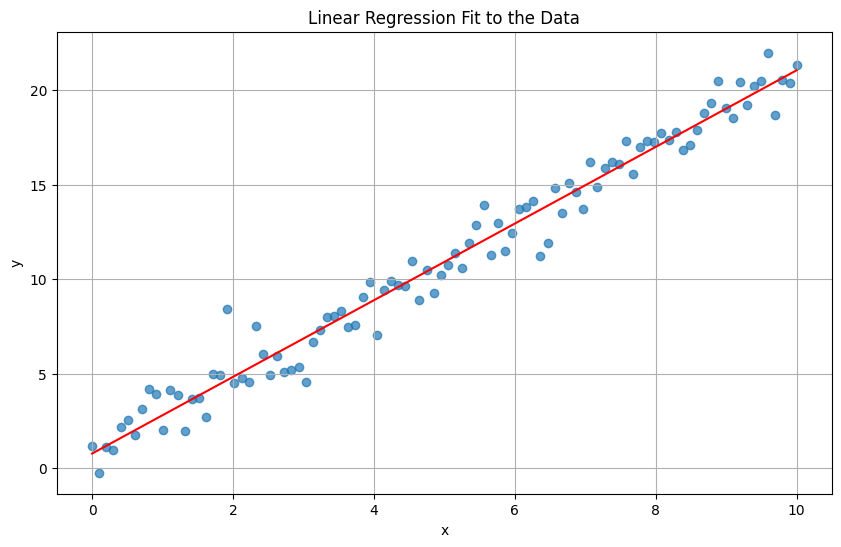

In [61]:
"""Plot the data with the fitted values"""
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.plot(data['independent'], data['fitted'], color='red', label='Fitted Line')
plt.title("Linear Regression Fit to the Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [68]:
from IPython.display import display, HTML

summary_data = {
    'Variable': ['Intercept', 'x', 'x^2', 'x^3', 'x5'],
    'Coefficient': [1,2,3,4,4],
    'Std-Error': [1,2,3,4,4],
    'T-Statistic': [1,2,3,4,4],
    'P>|t|': [0.98, 0.1, 0.04, 0.004, 0.001],
    'Conf. Interval': [[1,2],[2,3],[3,4],[4,5], [5,6]]
}
summary_df = pd.DataFrame(summary_data)
# Define the icons and hover descriptions for each header
header_tooltips = {
    'Variable': 
        'This is the independent variable in the regression model, which is the factor being manipulated or changed to observe its effect on the dependent variable.',
    'Coefficient': 
        'This represents the coefficient estimate of the variable, indicating how much the dependent variable is expected to change when the independent variable changes by one unit.',
    'Std-Error': 
        'This stands for the standard error of the coefficient estimate, which measures the average distance that the estimated coefficients are from the actual average value of the coefficients.',
    'T-Statistic': 
        'This is the t-statistic for the hypothesis test of the variable. It helps in determining whether there is a significant relationship between the independent and dependent variables by comparing the estimated coefficient to its standard error.',
    'P>|t|': 
        'This denotes the p-value, which indicates the probability of observing the data, or something more extreme, assuming the null hypothesis is true. It helps in assessing the significance of the variable in the model.',
    'Conf. Interval': 
        'The 95% confidence interval for the coefficient estimate. If we were to take many samples and build a confidence interval from each of them, 95% of these intervals would contain the true coefficient value.'
}


In [69]:

preformatted_text = "<h1 style='text-align:center;'>Regression Results</h1><pre style='text-align:center; font-family:monospace;'>"

column_widths = {key: max(max([len(str(x)) for x in summary_data[key]]), len(key)) for key in summary_data.keys()}
column_widths['Conf. Interval'] = max(max([len(f"{x[0]} - {x[1]}") for x in summary_data['Conf. Interval']]), len('Conf. Interval'))

headers = [key.center(column_widths[key]) for key in summary_data.keys()]
preformatted_text += ' '.join(headers) + "\n"

separator = '-'.join('-' * column_widths[key] for key in summary_data.keys())
preformatted_text += separator + "\n"

for i in range(len(summary_data['Variable'])):
    row = []
    for key in summary_data.keys():
        if key == 'Conf. Interval':
            # Create a string for the confidence interval
            ci_text = f"{summary_data[key][i][0]} - {summary_data[key][i][1]}"
            row.append(ci_text.center(column_widths[key]))
        else:
            row.append(str(summary_data[key][i]).center(column_widths[key]))
    preformatted_text += ' '.join(row) + "\n"

# Close the preformatted text tag
preformatted_text += "</pre>"

# Display the preformatted text
HTML(preformatted_text)


In [73]:
# Start with the title and dashed line
html_with_dashed_line = "<h2 style='text-align: center;'>Regression Results</h2><hr style='border-style: dashed;'>"

# Open the main container
html_with_dashed_line += "<div class='container'>"

# Add the headers with tooltips and data underneath
for key in summary_data.keys():
    # Column container
    html_with_dashed_line += "<div class='column'>"

    # Header
    tooltip = header_tooltips.get(key, "")
    html_with_dashed_line += f"""
    <div class='header'>
        <div class="hover-box">
            {key}
            <div class="hover-content">{tooltip}</div>
        </div>
    </div>
    """

    # Add a dashed line between header and data
    html_with_dashed_line += "<hr style='border-style: dashed; width: 100%;'>"

    # Data under each header
    for value in summary_data[key]:
        if isinstance(value, list):  # Assuming this is for the 'Conf. Interval'
            value = f"{value[0]} - {value[1]}"

        # Conditional formatting for P>|t| values
        if key == "P>|t|":
            try:
                numeric_value = float(value)
                if numeric_value <= 0.001:
                    cell_class = "data-cell red-deep"
                elif numeric_value <= 0.01:
                    cell_class = "data-cell red-medium"
                elif numeric_value <= 0.05:
                    cell_class = "data-cell red-light"
                else:
                    cell_class = "data-cell"
            except ValueError:
                cell_class = "data-cell"
        else:
            cell_class = "data-cell"

        html_with_dashed_line += f"<div class='{cell_class}'>{value}</div>"

    # Close column container
    html_with_dashed_line += "</div>"

# Close the main container
html_with_dashed_line += "</div>"

# Add styles with reduced spacing, flex alignment, and conditional coloring
html_with_dashed_line += """
<style>
.container {
    display: flex;
    justify-content: center;
    align-items: flex-start;
}

.column {
    display: flex;
    flex-direction: column;
    align-items: center;
    margin-right: 10px;
}

.header .hover-box {
    cursor: pointer;
    position: relative;
    display: inline-block;
}

.header .hover-content {
    display: none;
    position: absolute;
    background-color: grey;
    border: 1px solid black;
    padding: 15px;
    width: 350px;
    z-index: 1;
    white-space: wrap;
}

.header:hover .hover-content {
    display: block;
}

.data-cell {
    text-align: center;
    margin: 2px 0;
}

.red-light {
    color: red; /* Light shade for P>|t| < 0.05 */
}

.red-medium {
    color: darkred; /* Medium shade for P>|t| < 0.01 */
}

.red-deep {
    color: maroon; /* Deep shade for P>|t| < 0.001 */
}
</style>
"""
# Display the HTML content with a dashed line and conditional formatting
display(HTML(html_with_dashed_line))
